# Лабораторная работа №1

## Основные понятия математической статистики. Вариационный ряд. Эмпирическая функция распределения.

### Сформировать программными средствами равномерно распределенное число Ei из интервала [0, 1].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

a = 1
b = 2

n = int(input('Введите n: '))

Ei = sts.uniform().rvs(size=n)
    
print('Число Ei: ' + str(Ei))

Введите n: 100
Число Ei: [0.19514353 0.95515196 0.24496908 0.07957976 0.51039661 0.6288507
 0.24095155 0.94829153 0.44800722 0.88319638 0.84877647 0.16821417
 0.78661045 0.05009786 0.118321   0.10501618 0.66393186 0.10104142
 0.31031185 0.60934973 0.65132435 0.26449826 0.96678881 0.87630277
 0.9739306  0.10998781 0.41922857 0.124551   0.2358089  0.85731965
 0.82327593 0.77791173 0.4530922  0.74941834 0.65207496 0.88189265
 0.62750048 0.63535546 0.14315235 0.65324087 0.37591962 0.50735147
 0.84343134 0.86862582 0.86292076 0.23429824 0.77205355 0.16442788
 0.59436629 0.95003556 0.68799375 0.37805814 0.24063141 0.9058057
 0.85500397 0.89055192 0.93332475 0.49107262 0.28273889 0.98466207
 0.02500842 0.4201186  0.89315139 0.04481024 0.51417551 0.22937792
 0.21016878 0.96761059 0.29335344 0.85534897 0.04490058 0.56854551
 0.63074605 0.0078976  0.71538414 0.18742112 0.29348642 0.22626453
 0.94899574 0.38565008 0.78626004 0.74468394 0.0318726  0.51491616
 0.92429914 0.57602218 0.08596427 0.601

### Преобразовать Ei в число Xi равномерно распределенное на интервале [a, b] и получить случайное число Yi = ф(Xi) по формуле Xi = Ei * (b - a) + a

In [2]:
Xi = []
Yi = []

for i in range(n):
    Xi.append(Ei[i] * (b - a) + a)
    Yi.append(np.exp(Xi[i]))

print('Выборка: ' + str(Yi))

Выборка: [3.3040319653868133, 7.064992556450463, 3.472827424065695, 2.943442352707233, 4.528526489977635, 5.098012193777378, 3.458903208236354, 7.016689496937567, 4.254627505181825, 6.574485863161347, 6.352042819542199, 3.2162438314376356, 5.9691852775042635, 2.857930786626756, 3.059712642743125, 3.0192733306855346, 5.280030413818844, 3.0072962595788364, 3.7073296596909704, 4.999559123838922, 5.213880255888733, 3.541315475756729, 7.147687047598629, 6.529319773962221, 7.198917047907532, 3.0343214168742256, 4.133930165221447, 3.0788341409823525, 3.4411609342995155, 6.406541981093092, 6.192110205392798, 5.9174862067665845, 4.276317323304497, 5.751256443130943, 5.21779532544697, 6.565920109104902, 5.091133428997441, 5.131281625288235, 3.1366405941632607, 5.223882357818992, 3.958715582283369, 4.514757472613815, 6.318180963155015, 6.479386445239575, 6.442526387330334, 3.4359664668322885, 5.88292182038576, 3.204089249087943, 4.9252069235420475, 7.028937492424199, 5.408618744824732, 3.96719043

### Вариационный ряд полученной СВ

In [3]:
sorted_Yi = sorted(Yi)
values = {"Значение": sorted_Yi}
variation_range = pd.DataFrame(data=values)
print("Вариационный ряд:")
variation_range

Вариационный ряд:


,Значение
0,2.739835
1,2.787119
2,2.789961
3,2.806316
4,2.842859
...,...
95,7.064993
96,7.147687
97,7.153563
98,7.198917


### Эмпирическая функция распределения

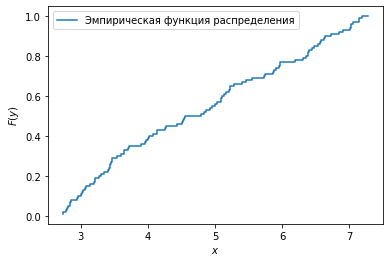

In [4]:
ecdf = ECDF(Yi)
plt.step(ecdf.x, ecdf.y, label='Эмпирическая функция распределения')

plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

### Теоритическая функция распределения

Функция распределения случайной величины $Y$ имеет вид:
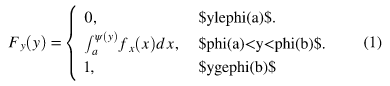

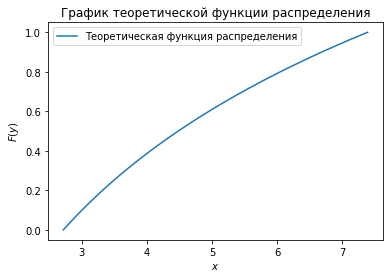

In [5]:
x = np.linspace(np.exp(1), np.exp(2), 3000)
y = (np.log(x) - 1)
plt.title("График теоретической функции распределения")
plt.plot(x, y, label='Теоретическая функция распределения')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

### Сравнение графиков

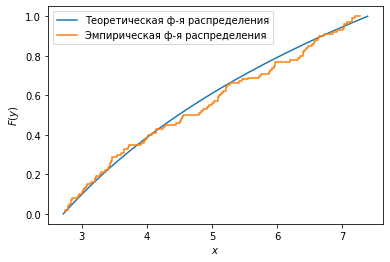

In [6]:
plt.plot(x, y, label='Теоретическая ф-я распределения')
plt.step(ecdf.x, ecdf.y, label='Эмпирическая ф-я распределения')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

# Лабораторная работа №2

## Статистический ряд. Построение гистограммы равноинтервальным и равновероятным методами.

### 2.1. Для полученной случайной величины построить гистограмму равноинтервальным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным.

Полигон распределения, гистограмма равноинтервальным методом:

Text(0, 0.5, 'F(Y)')

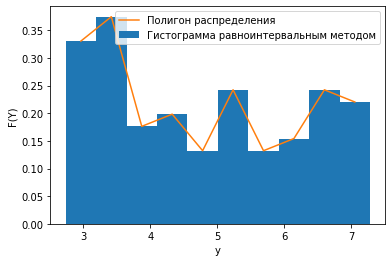

In [7]:
if n <= 100:
    M = int(np.sqrt(n))
else:
    int(4 * np.log(n)) # эмпирически определяем количество интервалов
    
nums, probas, _ = plt.hist(Yi, bins=M, density=True, label='Гистограмма равноинтервальным методом')
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums, label='Полигон распределения')
plt.legend(loc='upper right')

plt.xlabel("y")
plt.ylabel("F(Y)")

Эмпирическая функция по сгруппированным данным:

,Y,F(Y)
0,2.739835,0.00
1,3.193510,0.15
2,3.647185,0.32
3,4.100861,0.40
4,4.554536,0.49
5,5.008211,0.55
6,5.461887,0.66
7,5.915562,0.72
8,6.369237,0.79
9,6.822913,0.90


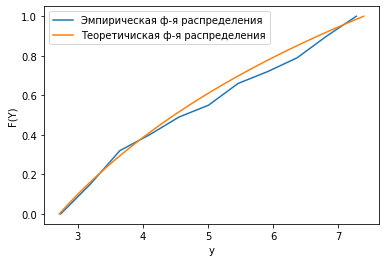

In [8]:
# построим эмпирическую функцию распределения по сгруппированным данным ь

normed_nums = nums * (probas[1] - probas[0])
# убедимся, что сумма всех вероятностей равна 1:
#print(normed_nums.sum())

ecdf = []
sum = 0
for i in normed_nums:
    ecdf.append(sum)
    sum += i
ecdf.append(1)

plt.plot(probas, ecdf, label='Эмпирическая ф-я распределения')
plt.plot(x, y, label='Теоретичиская ф-я распределения')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")

table = pd.DataFrame(data={"Y": probas, "F(Y)": ecdf})
table

### 2.2 Найти теоретически плотность распределения СВ Y. Результаты представить в аналитическом виде и в виде графика.

Text(0, 0.5, 'f(Y)')

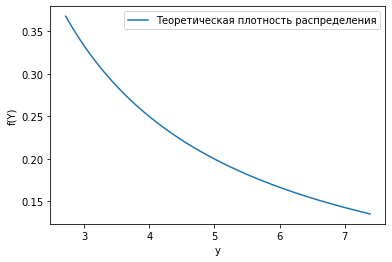

In [9]:
py = 1/x
plt.plot(x, py, label='Теоретическая плотность распределения')
plt.legend(loc='upper right')
plt.xlabel("y")
plt.ylabel("f(Y)")

### Сравнить полученные результаты, представив графики теоретической и эмпирической плотностей распределения в одном окне.

Text(0, 0.5, 'f(Y)')

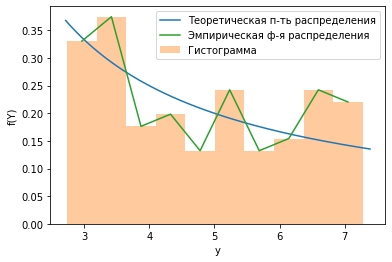

In [10]:
plt.plot(x, py, label='Теоретическая п-ть распределения')
plt.hist(Yi, bins=M, density=True, label='Гистограмма', alpha=0.4)
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums, label='Эмпирическая ф-я распределения')

plt.legend(loc='upper right')
plt.xlabel("y")
plt.ylabel("f(Y)")

### 3.1 Для полученной случайной величины построить гистограмму равновероятностным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным. Результаты представить в виде таблицы и графика.

Полигон распределения, гистограмма равновероятностным методом:

,x0,normed m
0,2.739835,0.357860
1,3.019273,0.298706
2,3.354051,0.343715
3,3.644989,0.204524
4,4.133930,0.142501
5,4.835682,0.304847
6,5.163716,0.141170
7,5.872079,0.191626
8,6.393929,0.219098
9,6.850346,0.234608


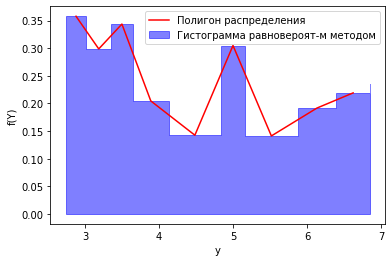

In [11]:
m = n // M

def hist_eq_prob(sample):
    sample.sort()
    A = [sample[0]]
    B = []
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    B.append(sample[-1])
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1 /(M * i))
        x.append(s)
        s += i
        
    return (x, y)


xx, yy = hist_eq_prob(Yi)
plt.fill_between(xx, y1=yy, y2=[0]*len(yy), color='b', step='post', alpha=0.5, label="Гистограмма равновероят-м методом")
nx = []
for i in range(len(xx) - 1):
    nx.append((xx[i] + xx[i+1]) / 2)
plt.plot(nx, yy[:-1], color='r', label='Полигон распределения')
plt.legend(loc='upper right')
plt.xlabel("y")
plt.ylabel("f(Y)")

table2 = pd.DataFrame(data={"x0" : xx, "normed m": yy})
table2

Эмпирическая функция по сгруппированным данным:

Text(0, 0.5, 'F(Y)')

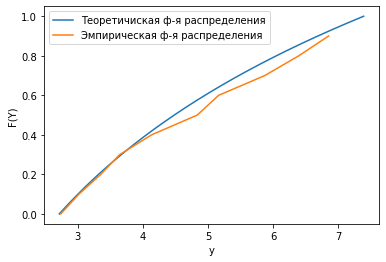

In [12]:
ecdf = []
sum = 0
for i in range(len(yy)):
    ecdf.append(sum)
    sum += 1 / M
    
plt.plot(x, y, label='Теоретичиская ф-я распределения')
plt.plot(xx, ecdf, label='Эмпирическая ф-я распределения')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")

### 3.2 Сравнить полученные результаты, представив графики теоретической и эмпирической плотностей распределения в одном окне.

Text(0, 0.5, 'f(Y)')

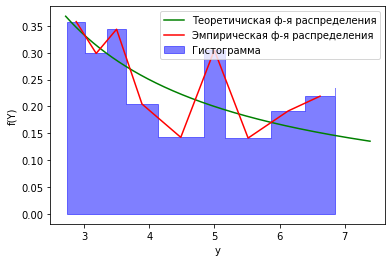

In [15]:
plt.plot(x, py, label='Теоретичиская ф-я распределения', color='g')
plt.fill_between(xx, y1=yy, y2=[0]*len(yy), color='b', step='post', alpha=0.5, label="Гистограмма")
plt.plot(nx, yy[:-1], color='r', label='Эмпирическая ф-я распределения')

plt.legend(loc='upper right')
plt.xlabel("y")
plt.ylabel("f(Y)")